# Case Study 1 : Data Mining in Financial Data

**Financial Data Collection:** 
* Please collect five-year stock price data of at least 5 stocks. You can choose any stocks you'd like to analyze.
* You have multiple ways of collecting financial data with Python, here is a reference: https://www.alpharithms.com/python-financial-data-491110/
* Load the data you collect and start working on your idea.


I would like to start by saying that I have taken math classes at Binghamton in statistical learning and regression analysis. In this notebook, I apply several of the techniques I learned in these classes

# Problem: pick a data science problem that you plan to solve using Stock Price Data
* The problem should be important and interesting, which has a potential impact in some area.
* The problem should be solvable using the data available and data science solutions.

Please briefly describe in the following cell: what problem are you trying to solve? why this problem is important and interesting?

Sometimes, excutives and analysts are curious about how their company will perform in the future, given their current performance. However, they may not have the ability to build a model that's been trained on their company data. How can executives work around this dilema and still predict their companies future?

One idea is the company uses an already trained model from an organization in the same or similar field. Hypothetically, if a well trained model has picked up on the stock performance patterns of other companies, maybe those patterns are generalizable and can be used to make robust predictions for another company.

The models designed below perform the following: predict the stock patterns of companies D and E, after being trained on stock data from companies A, B, and C. 

# Data Collection/Processing: 

In [296]:
#first, we pip install the "yfinance" library. This is how we can pull real time stock data from actual finance companies 

%pip install --upgrade pip setuptools wheel
%pip install --only-binary=:all: multitasking==0.0.11
%pip install yfinance --no-deps
%pip install "curl_cffi>=0.7" "websockets>=13.0" "frozendict>=2.3.4" "peewee>=3.16.2" "protobuf>=3.19.0"

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [298]:
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary
import yfinance as yf #import the yahoo finance library to pull the necessary data

In [300]:
data_jpmorg = yf.Ticker("JPM").history(period='5y') #pull 5 years worth of jp morgan data
data_goldsachs = yf.Ticker("GS").history(period='5y') #pull 5 years worth of goldman sachs data
data_paypal = yf.Ticker("PYPL").history(period='5y') #pull 5 years worth of pay pal data
data_metlife = yf.Ticker("MET").history(period='5y') #pull 5 years worth of metlife data
data_aig = yf.Ticker("AIG").history(period='5y') #pull 5 years worth of AIG data

In [302]:
data_paypal.tail(20) #let's look at the data, just to make sure what we pulled is correct

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-08-05 00:00:00-04:00,68.459999,68.669998,67.410004,67.830002,10714700,0.0,0.0
2025-08-06 00:00:00-04:00,68.300003,69.610001,68.209000,69.419998,11913000,0.0,0.0
2025-08-07 00:00:00-04:00,70.000000,70.169998,67.680000,68.220001,10129300,0.0,0.0
2025-08-08 00:00:00-04:00,68.440002,68.610001,67.419998,67.650002,9683400,0.0,0.0
2025-08-11 00:00:00-04:00,67.809998,68.480003,66.900002,67.080002,10118600,0.0,0.0
2025-08-12 00:00:00-04:00,67.239998,68.739998,67.230003,67.970001,9747500,0.0,0.0
2025-08-13 00:00:00-04:00,68.230003,70.730003,68.150002,70.629997,12344700,0.0,0.0
2025-08-14 00:00:00-04:00,69.440002,69.820000,68.230003,69.379997,10695400,0.0,0.0
2025-08-15 00:00:00-04:00,69.570000,70.160004,69.160004,69.230003,8128000,0.0,0.0


# Data Exploration: Exploring the Dataset

**Plot the daily, weekly and monthly returns of a set of stocks of your choice** 
* references:
    * https://www.investopedia.com/terms/y/yearly-rate-of-return-method.asp
    * https://www.fool.com/knowledge-center/how-to-calculate-a-monthly-return-on-investment/#:~:text=Take%20the%20ending%20balance%2C%20and,corresponds%20to%20your%20monthly%20return.
    * https://www.investopedia.com/terms/i/intraday-return.asp#:~:text=How%20Is%20Daily%20Return%20Calculated,price%2C%20then%20multiply%20by%20100. 


In [105]:
#import the necessary libraries for the visual and modeling analyses
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import PercentFormatter

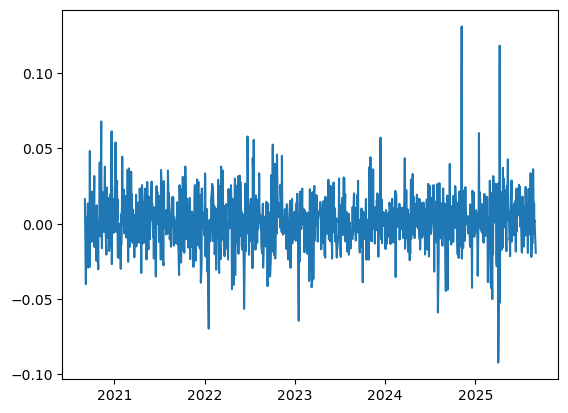

In [304]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

#used this website for formula to calculate returns on stock investment: https://smartasset.com/investing/investment-calculator#:~:text=You%20can%20calculate%20the%20return,investment%20and%20multiply%20by%20100.

daily_close = data_goldsachs['Close'][::1] #We will be comparing every row to the previous row (aka, daily comparisons as each row 
#represents one day)
daily_returns = (daily_close[1:].values - daily_close[:-1].values) / daily_close[:-1].values #take previous day's returns and subtract it
#from the today's returns. Then divide by "total amount invested" or today's returns. 
daily_dates = daily_close.index[1:] #retrieve the dates
daily_returns = pd.Series(daily_returns, index = daily_dates) #ensure the calculated returns are in the correct order & append them to
#initialized list

plt.plot(daily_returns) #plot the daily returns

#This is cool... but hard to interpret. Let's look at the first and last quarters

n = len(daily_returns) #get length of list
first_quarter = daily_returns[:n//4] #take the first 25% of the list
last_quarter = daily_returns[-n//4:]  #take last 25% of the list

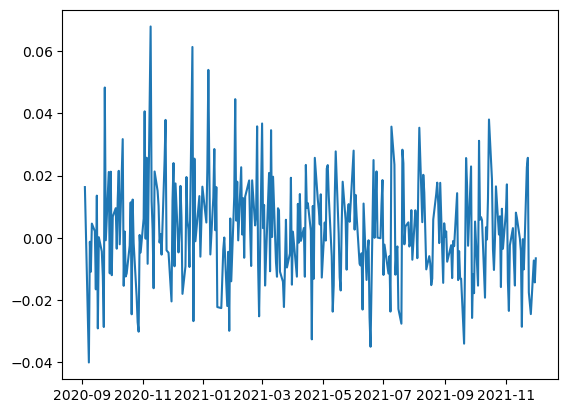

In [306]:
plt.plot(first_quarter)

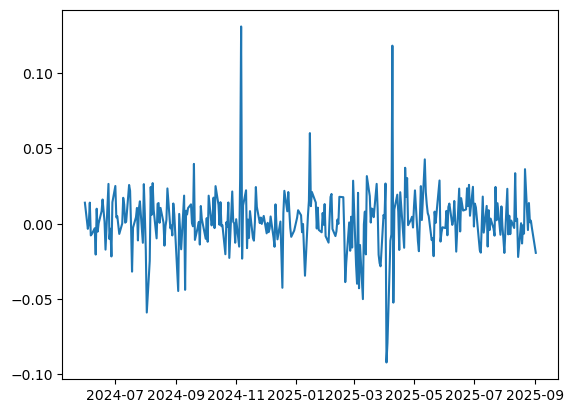

In [308]:
plt.plot(last_quarter)

In [310]:
#Much more interesting! Now we can really see where those peaks are. 

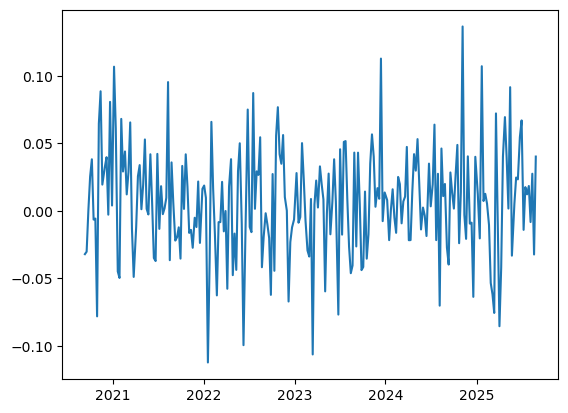

In [312]:
weekly_close = data_goldsachs['Close'][::5] #We will be comparing every 5th row to the previous 5th row (aka, weekly comparisons as every 
#5th row represents 1 week)
weekly_returns = (weekly_close[1:].values - weekly_close[:-1].values) / weekly_close[:-1].values #take previous weeks's returns and 
#subtract it from the this week's returns. Then divide by "total amount invested" or this week's returns. 
weekly_dates = weekly_close.index[1:] #retrieve the dates
weekly_returns = pd.Series(weekly_returns, index = weekly_dates) #ensure the calculated returns are in the correct order & append them to
#initialized list

plt.plot(weekly_returns) #plot the daily returns

#Again, this is interesting but not very helpful. Let's zoom in on the middle 25%-50% of the data and the last 25%

n = len(weekly_returns)
middle_quarter_1 = weekly_returns.iloc[n//4 : n//2]
last_quarter = weekly_returns[-n//4:]  #take last 25% of the list

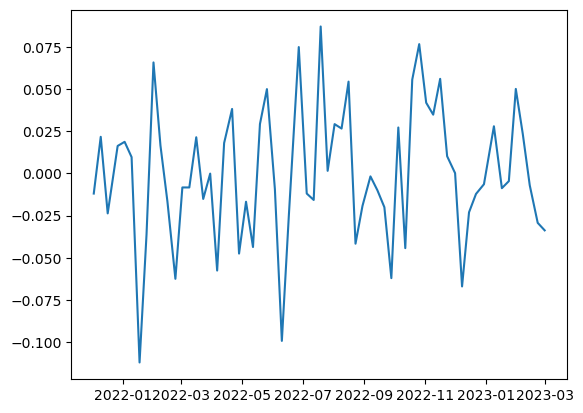

In [314]:
plt.plot(middle_quarter_1)

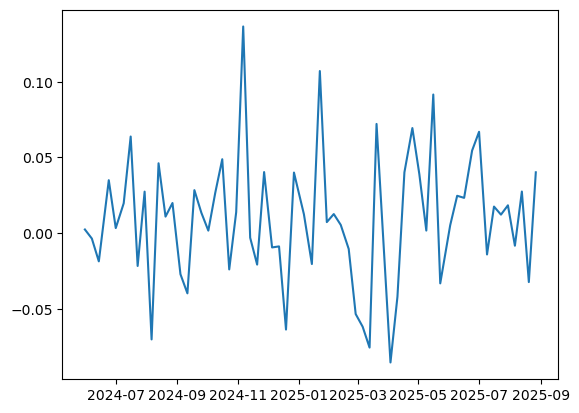

In [316]:
plt.plot(last_quarter)

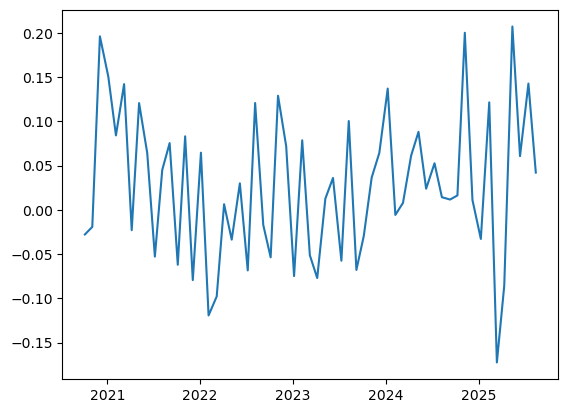

In [318]:
monthly_close = data_goldsachs['Close'][::21] #We will be comparing every 21st row to the previous 21st row (aka, monthly comparisons as 
#every 21st row is approximatly a new month)
monthly_returns = (monthly_close[1:].values - monthly_close[:-1].values) / monthly_close[:-1].values #take previous month's returns and 
#subtract it from this month's returns. Then divide by "total amount invested" or this month's returns. 
monthly_dates = monthly_close.index[1:] #retrieve the dates
monthly_returns = pd.Series(monthly_returns, index = monthly_dates) #ensure the calculated returns are in the correct order & append them to
#initialized list

plt.plot(monthly_returns) #plot the daily returns

#no need to zoom in this time...monthly is high level enough that we can extract insights from just this image!

**Other data explorations you would like to present:**

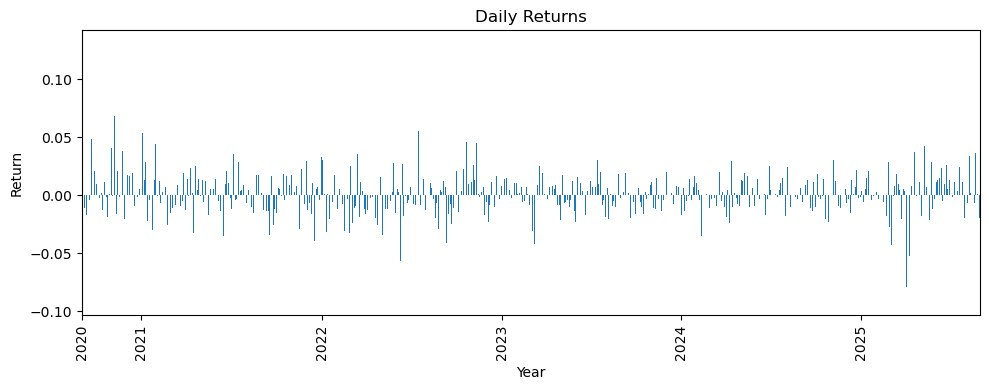

In [320]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

fig, ax = plt.subplots(figsize=(10, 4)) #decide the dimensions of the plot
daily_returns.plot(kind='bar', ax=ax) #make a barplot of the daily returns

ax.set_title('Daily Returns') #give title
ax.set_ylabel('Return') #give y label
ax.set_xlabel('Year') #give x label

#there are A LOT of x ticks if we include them all. So, we only include ticks when a new year starts:
ix = daily_returns.index #retrieve the indices of the entries in our list
year_pos = [0] + [i for i in range(1, len(ix)) if ix[i].year != ix[i-1].year] #examine all the years. When the year (i) differs from the
#year prior (i-1), include it in the xticks. 
ax.set_xticks(year_pos) #set x ticks
ax.set_xticklabels([str(ix[i].year) for i in year_pos]) #only include the x ticks from year_pos

plt.tight_layout() #make the plot longer
plt.show() #display the plot

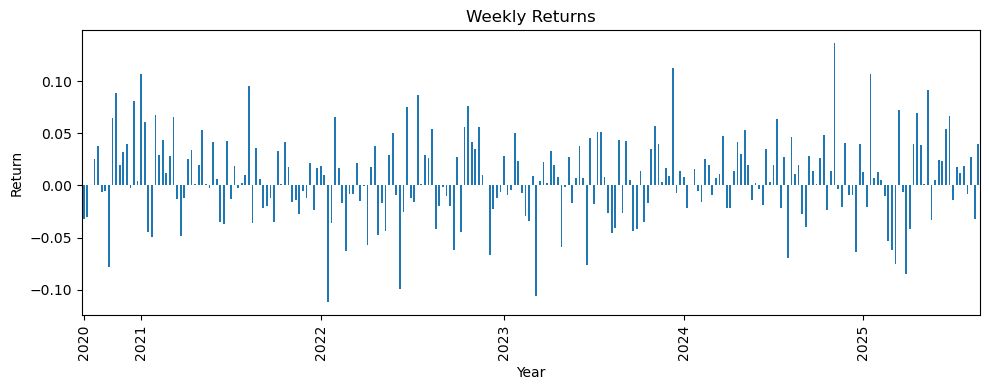

In [322]:
fig, ax = plt.subplots(figsize=(10, 4)) #decide the dimensions of the plot
weekly_returns.plot(kind='bar', ax=ax) #make a barplot of the weekly returns

ax.set_title('Weekly Returns') #give title
ax.set_ylabel('Return') #give y label
ax.set_xlabel('Year')  #give x label

#there are A LOT of x ticks if we include them all. So, we only include ticks when a new year starts:
ix = weekly_returns.index #retrieve the indices of the entries in our list
year_pos = [0] + [i for i in range(1, len(ix)) if ix[i].year != ix[i-1].year] #examine all the years. When the year (i) differs from the
#year prior (i-1), include it in the xticks. 
ax.set_xticks(year_pos) #set x ticks
ax.set_xticklabels([str(ix[i].year) for i in year_pos]) #only include the x ticks from year_pos

plt.tight_layout() #make the plot longer
plt.show() #display the plot

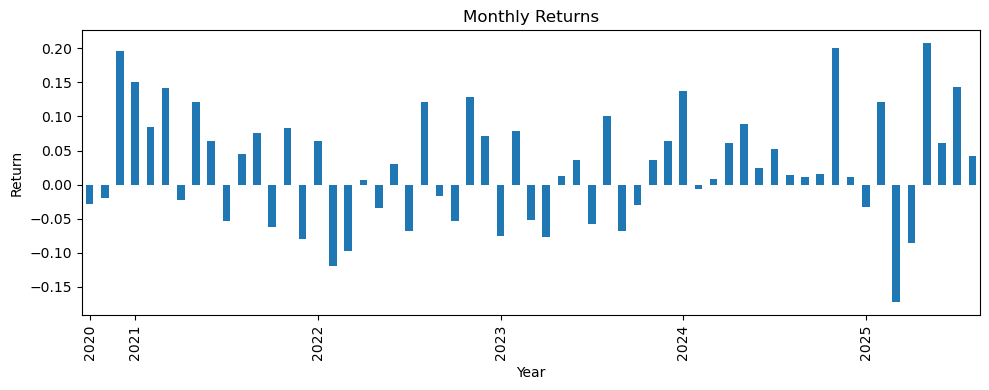

In [324]:
fig, ax = plt.subplots(figsize=(10, 4))  #decide the dimensions of the plot
monthly_returns.plot(kind='bar', ax=ax)  #make a barplot of the monthly returns

ax.set_title('Monthly Returns') #give title
ax.set_ylabel('Return') #give y label
ax.set_xlabel('Year') #give x label

#there are A LOT of x ticks if we include them all. So, we only include ticks when a new year starts:
ix = monthly_returns.index #retrieve the indices of the entries in our list
year_pos = [0] + [i for i in range(1, len(ix)) if ix[i].year != ix[i-1].year] #examine all the years. When the year (i) differs from the
#year prior (i-1), include it in the xticks.
ax.set_xticks(year_pos) #set x ticks
ax.set_xticklabels([str(ix[i].year) for i in year_pos]) #only include the x ticks from year_pos

plt.tight_layout() #make the plot longer
plt.show() #display the plot

From these graphs, we see that the trends in returns are quite unstable and range greatly at all levels (daily, weekly, and monthly).  However, it is apparent that patterns do exist within our data, but it's hard to visually distinguish them. Some data science modeling is required to extract any meaningful insights. Additionally, none of these graphs don't answer the proposed question: can a model trained on one companies stock data make robust and accurate predictions about another companies future stock data?

# The Solution: implement a data science solution to the problem you are trying to solve.

**Briefly describe the idea of your solutions to the problem in the following cell (you should use at least 2 methods/models to solve the problem, and compare the performance. Feel free to use any machine learning models or statistical models.):**

We train two models: an OLS regression and a support vector regressor. The former model was selected because it's designed for linear data. The latter model was selected because its hyperparameters (the selected kernel) can be modified to best fit linear data. Although no tests have been performed to asses the complexity of the relationship between our X and Y, it's apparent that many of our features are similar, which could result in colinearity. This means our features can be written as linear combinations of each other, resulting in a linear relationship. Thus, we select models that fit well to data with a linear relationship. 

Our X_train is the 'Open', 'High', 'Low', 'Volume' data from JP Morgan, Paypal, Metlife, and AIG. Our X_test comprises of these same columns but for Goldman sachs. y_train is 'Close' data for JP Morgan, Paypal, Metlife, and AIG. y_test is this same column, but for Goldman Sachs. 

We remove unnecessary features, such as 'Dividends', 'Stock Splits'

It is important to note that each observation in the X predictors are "shifted"; the goal in to use "today's" stock data to make market predictions for "tomorrow". For example: take an observation from November, 4 2024. While our X_train data describes November 4, 2024's stock market, the y_train describes November 5, 2024's close data. This way, our model is learning how to predict tomorrows trends from today's data. This is the same case for the test set. 







**Write codes to implement the solution in python:**

In [231]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

#import additional necessary packages for modeling
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

#set a seed for reproducibility 
np.random.seed(42)

In [246]:
#First, we data clean/prep!


#Train
data_jpmorg = data_jpmorg.reset_index(drop = True) #for some reason, the index is the date. Get rid of it
#we want to use "yesterday's" data to predict today's close. So, we shift our predictors back one, so that yesterday's features align with
#today's close in our data frame
data_jpmorg[['Open','High','Low','Volume']] = data_jpmorg[['Open','High','Low','Volume']].shift(1) 
data_jpmorg = data_jpmorg.dropna().reset_index(drop=True) #indices got messed up after the shift so reset them again
X_jpmorg = data_jpmorg.drop(columns = ['Close', 'Dividends', 'Stock Splits']) #isolate our features
y_jpmorg = data_jpmorg['Close'] #isolate the target
#print(X_jpmorg.head(10))
#print(y_jpmorg.head(10))

data_paypal = data_paypal.reset_index(drop = True) #get rid of date index
#we want to use "yesterday's" data to predict today's close. So, we shift our predictors back one, so that yesterday's features align with
#today's close in our data frame
data_paypal[['Open','High','Low','Volume']] = data_paypal[['Open','High','Low','Volume']].shift(1)
data_paypal = data_paypal.dropna().reset_index(drop=True) #indices got messed up after the shift so reset them again
X_paypal = data_paypal.drop(columns = ['Close', 'Dividends', 'Stock Splits']) #isolate our features
y_paypal = data_paypal['Close'] #isolate the target
#print(X_paypal.head(10))
#print(y_paypal.head(10))

data_metlife = data_metlife.reset_index(drop = True) #get rid of date index
#we want to use "yesterday's" data to predict today's close. So, we shift our predictors back one, so that yesterday's features align with
#today's close in our data frame
data_metlife[['Open','High','Low','Volume']] = data_metlife[['Open','High','Low','Volume']].shift(1)
data_metlife = data_metlife.dropna().reset_index(drop=True) #indices got messed up after the shift so reset them again 
X_metlife = data_metlife.drop(columns = ['Close', 'Dividends', 'Stock Splits']) #isolate our features
y_metlife = data_metlife['Close'] #isolate the target
#print(X_metlife.head(10))
#print(y_metlife.head(10))

data_aig = data_aig.reset_index(drop = True) #get rid of date index
#we want to use "yesterday's" data to predict today's close. So, we shift our predictors back one, so that yesterday's features align with
#today's close in our data frame
data_aig[['Open','High','Low','Volume']] = data_aig[['Open','High','Low','Volume']].shift(1)
data_aig = data_aig.dropna().reset_index(drop=True) #indices got messed up after the shift so reset them again
X_aig = data_aig.drop(columns = ['Close', 'Dividends', 'Stock Splits']) #isolate our features
y_aig = data_aig['Close'] #isolate the target
#print(X_aig.head(10))
#print(y_aig.head(10))

#combine the train X's
df = pd.concat([X_jpmorg, X_paypal], ignore_index=True) 
df2 = pd.concat([df, X_metlife], ignore_index=True) 
X = pd.concat([df2, X_aig], ignore_index=True)

#combine the train y's
df3 = pd.concat([y_jpmorg, y_paypal], ignore_index=True) 
df4 = pd.concat([df3, y_metlife], ignore_index=True) 
y = pd.concat([df4, y_aig], ignore_index=True)

#Test
data_goldsachs = data_goldsachs.reset_index(drop = True) #get rid of date index
#we want to use "yesterday's" data to predict today's close. So, we shift our predictors back one, so that yesterday's features align with
#today's close in our data frame
data_goldsachs[['Open','High','Low','Volume']] = data_goldsachs[['Open','High','Low','Volume']].shift(1)
data_goldsachs = data_goldsachs.dropna().reset_index(drop=True) #indices got messed up after the shift so reset them again
X_goldsachs = data_goldsachs.drop(columns = ['Close', 'Dividends', 'Stock Splits']) #isolate our features
y_goldsachs = data_goldsachs['Close'] #isolate the target
#print(X_goldsachs.head(10))
#print(y_goldsachs.head(10))

In [248]:
regress_model = LinearRegression().fit(X, y) #fit the model
y_pred_lr = regress_model.predict(X_goldsachs) #predict on the goldman sachs data

In [252]:
model = make_pipeline(StandardScaler(), SVR(kernel='linear')) #here, we select the linear kernel because our data is likely linear
model.fit(X, y) #fit the model
y_pred_svr = model.predict(X_goldsachs) #make predictions

# Results: summarize and visualize the results discovered from the analysis

**Summarize the results of different models. Compare the perfomance and explain it. Please use figures or tables to present the results.**


In [277]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

#first we evaluate the performance of our data
print("LR R^2: ", r2_score(y_goldsachs, y_pred_lr)) #let's see if our model captures the variance in the data
print("LR MSE: ", mean_squared_error(y_goldsachs, y_pred_lr, squared = False)) #how far off are our predictions?

LR R^2:  0.9829242448198452
LR MSE:  16.364320882905563


In [275]:
print("SVR R^2 :", r2_score(y_goldsachs, y_pred_svr)) #calculate R^2
print("SVR MSE :", mean_squared_error(y_goldsachs, y_pred_svr, squared = False)) #calculate residual mean squared error

SVR R^2 : 0.9826118436802648
SVR MSE : 16.513335138011005


In [260]:
y_goldsachs.mean(), y_goldsachs.std() #RMSE is hard to interpret without understanding the scale of the values. So, we print out the mean
#and standard deviation to compare to the RMSE

(379.43887347397475, 125.27998000826179)

As can be seen, both models are performing exceptionally well. The R^2 value is quite high, meaning our models are capturing almost all of (~98%) the variance in the data. This is unsurprising; we hypothesized a linear association between X and Y, hence a linear model is able to capture what little variance there is in amongst the features. Side note: despite this, in a later part of this notebook, we discover that the data is not quite as linear as we expected

Additionally, the MSE is quite small in comparison to the mean and standard deviation of Goldman Sach's y values. Again, this is an indicator that our model is performing well. 

The lack of significant difference between the R^2 and MSE of the models suggests that truly, no model is better than the other. However, let's continue to compare the models so we can make a well informed conclusion.

Let's make an actual vs predicted scatterplot to see if our two models are making similar errors

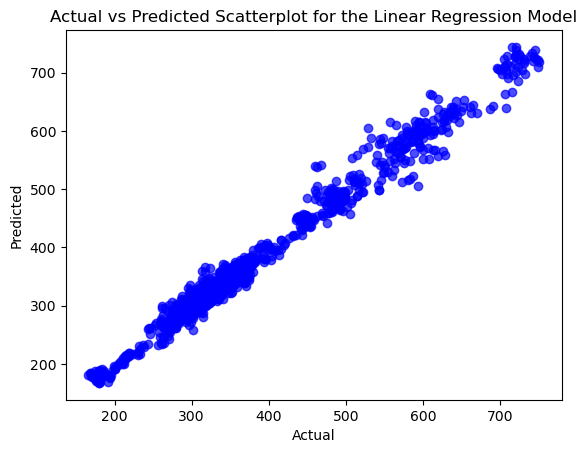

In [266]:
plt.scatter(y_goldsachs, y_pred_lr, color = "blue", alpha = 0.7, label = "Predictions") #design the scatterplot
plt.title("Actual vs Predicted Scatterplot for the Linear Regression Model") #assign a title
plt.xlabel("Actual") #assign an x label
plt.ylabel("Predicted") #assign a y label
plt.show() #display the plot

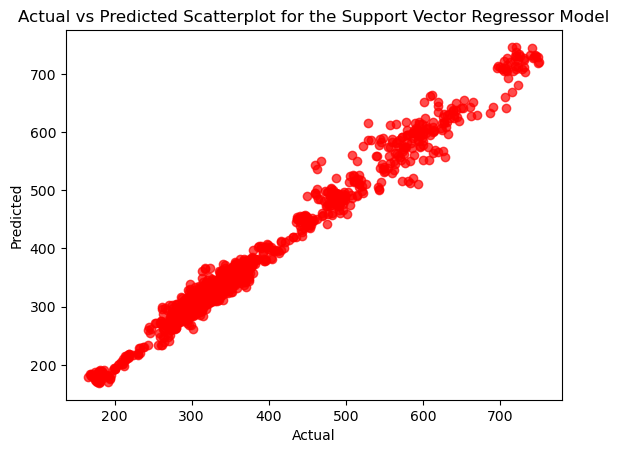

In [270]:
plt.scatter(y_goldsachs, y_pred_svr, color = "red", alpha = 0.7, label = "Predictions") #design the scatterplot
plt.title("Actual vs Predicted Scatterplot for the Support Vector Regressor Model") #assign a title
plt.xlabel("Actual") #assign an x label
plt.ylabel("Predicted") #assign a y label
plt.show() #display the plot

As can be seen above, the pattern of the errors appears very similar between the models. This tells us that the models are capturing the same patterns. Again, neither model outperforms the other. Let's make a predicted vs residuals plot so we can investigate the magnitude of the errors

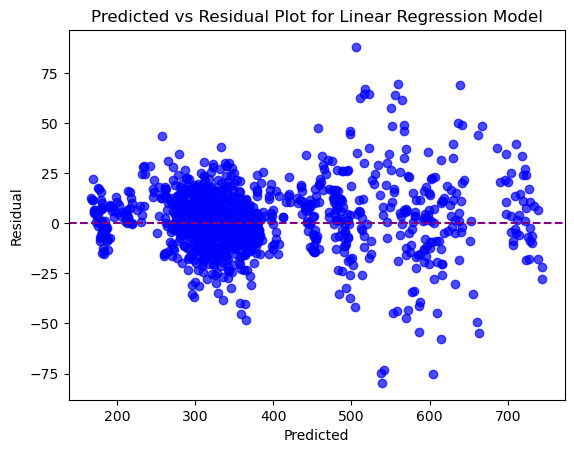

In [293]:
residuals = y_goldsachs - y_pred_lr #calculate the residuals

plt.scatter(y_pred_lr, residuals, color = "blue", alpha = 0.7) #design the scatterplot
plt.title("Predicted vs Residual Plot for Linear Regression Model") #assign a title
plt.xlabel("Predicted") #assign an x label
plt.ylabel("Residual") #assign a y label
plt.axhline(y = 0, color = "purple", linestyle = "--") #display and customize the axis line

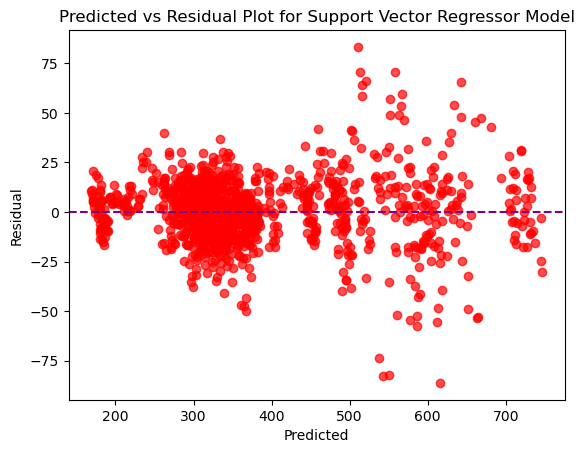

In [291]:
residuals = y_goldsachs - y_pred_svr #calculate the residuals

plt.scatter(y_pred_svr, residuals, color = "red", alpha = 0.7) #design the scatterplot
plt.title("Predicted vs Residual Plot for Support Vector Regressor Model") #assign a title
plt.xlabel("Predicted") #assign an x label
plt.ylabel("Residual") #assign a y label
plt.axhline(y = 0, color = "purple", linestyle = "--") #display and customize the axis line

Again, these plots look very similar. Thus, we can conclude that neither model is better than the other.

However, these two plots do provide us with other interesting information. Here, we can see that these errors follow a fan shape and cluster heavily around certain points. This tells us that our errors are not constant (heteroscedastic), which violates one of the fundamental assumptions of linear regression. In this case of this project, we only care about the robustness of our predictions, hence such a violation is of little concern. However, if this were an inference problem, it would be wise to apply a transformation to either X or Y to stabilize the errors. If this were to not work, linear modeling would have to be discarded entirely. 

How stable is our model? Let's look at a correlation matrix to decide

In [330]:
corr_matrix = X.corr()

print(corr_matrix)

            Open      High       Low    Volume
Open    1.000000  0.999825  0.999754  0.201587
High    0.999825  1.000000  0.999717  0.204878
Low     0.999754  0.999717  1.000000  0.195205
Volume  0.201587  0.204878  0.195205  1.000000


These high correlation values tell us that some of these features are severely dependent. This has little to no influence on the predictive robustness of our models, however it does tell us that the models are extremely unstable. Should another feature or influential data point be added, the estimated coefficients could shift drastically, impacting the effectiveness of the model. For better stability, redundant features should be removed.

In conclusion, although the predictive abilities of both the linear regression and support vector regressors are equally powerful, the inferential abilities of these models are lacking. To use these models to extract insights, one would need to carefully address issues such as multicollinearity, heteroscedasticity, and the interpretability of coefficients.


# Done

All set! 

**What do you need to submit?**

* **Notebook File**: Save this Jupyter notebook, and submit it in BrightSpace. This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. 


**How to submit:**
* Please submit through BrightSpace, in the Assignment "Case Study 1".
        
        
